In [20]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
#import matplotlib.pyplot as plt

start = datetime.datetime(2016, 2, 19)
end = datetime.datetime(2016, 3, 4)

#gs = web.DataReader("078930.KS", "yahoo", "2016-01-01", "2016-03-06")
inno = web.DataReader("073490.KQ", "yahoo")
inno.info()
#inno.head()

inno = inno[['Adj Close']] #only Adj Close
#inno.head()

inno['short_mean'] = inno['Adj Close'].rolling(window=5).mean() #5일 평균종가
inno['long_mean'] = inno['Adj Close'].rolling(window=40).mean() #40일 평균종가

inno.head(10)


RemoteDataError: Unable to read URL: https://query1.finance.yahoo.com/v7/finance/download/073490.KQ?events=history&crumb=b76e3kRL%5Cu002FHw&period1=1262304000&interval=1d&period2=1514332799

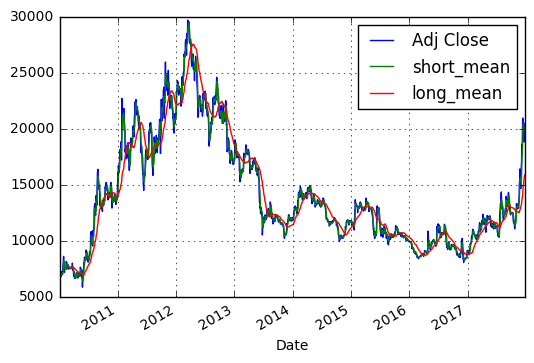

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(40,10))
inno.plot()
plt.grid()
plt.show()

/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


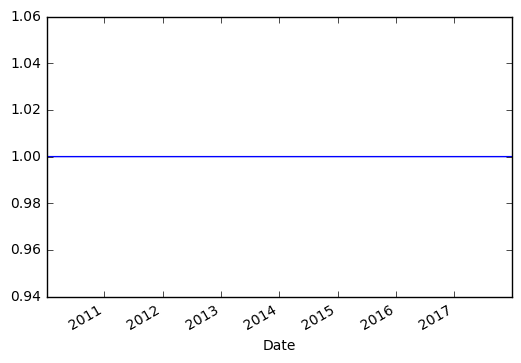

In [19]:
inno['order'] = 0
inno['order'][inno.short_mean>inno.short_mean] = 1

inno['order'] = inno['order'].shift(1)

inno['returns'] = inno['Adj Close'] / inno['Adj Close'].shift(1) - 1
inno['returns'] = inno['returns']*inno['order']
inno['cumreturns'] = (1+inno.returns).cumprod()
inno.cumreturns.plot()
plt.show()
#inno.head(20)